In [1]:
from pathlib import Path
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 14})

In [2]:
tests = pd.read_csv('tests.csv')
utility = pd.read_csv('utility.csv')
train = pd.read_csv('train.csv')
welfare = pd.read_csv('welfare.csv')

train.update(tests)

In [3]:
# Find max over all misreports
util = utility.query("Report > 0").groupby(['Iter','Agent','Noise','Clip','Exp'])['Utility'].max()

# Transform to df with index/columns
util_data = pd.DataFrame(pd.DataFrame(util).to_records()) 

In [4]:
# Find min revenue over all misreports
tr = train.groupby(['Iter','Noise','Clip','Exp'])['Revenue'].min()

# Transform to df with index/columns
train_data = pd.DataFrame(pd.DataFrame(tr).to_records())

In [5]:
# Find max regret over all misreports
reg = utility.query("Report > 0").groupby(['Iter','Agent','Noise','Clip','Exp'])['Regret'].max()

# Transform to df with index/columns
reg_data = pd.DataFrame(pd.DataFrame(reg).to_records()) 

In [6]:
# Find max regret over all misreports
reg_s = train.groupby(['Iter','Noise','Clip','Exp'])['Regret'].max()

# Transform to df with index/columns
reg_sum_data = pd.DataFrame(pd.DataFrame(reg_s).to_records())

In [7]:
# Find min welfare over all misreports
wel = welfare.groupby(['Iter','Noise','Clip','Exp'])['Welfare'].min()

# Transform to df with index/columns
wel_data = pd.DataFrame(pd.DataFrame(wel).to_records()) 

## NOTE: sample is 128 valuation sets out of 2^(n+m)
## NOTE: Agents are 0 indexed in the code

# Regret per agent

### Applying noise tightens regret bounds for misreporting Agent (Agent0) over all sampled valuation sets. See the first row of the following figure.

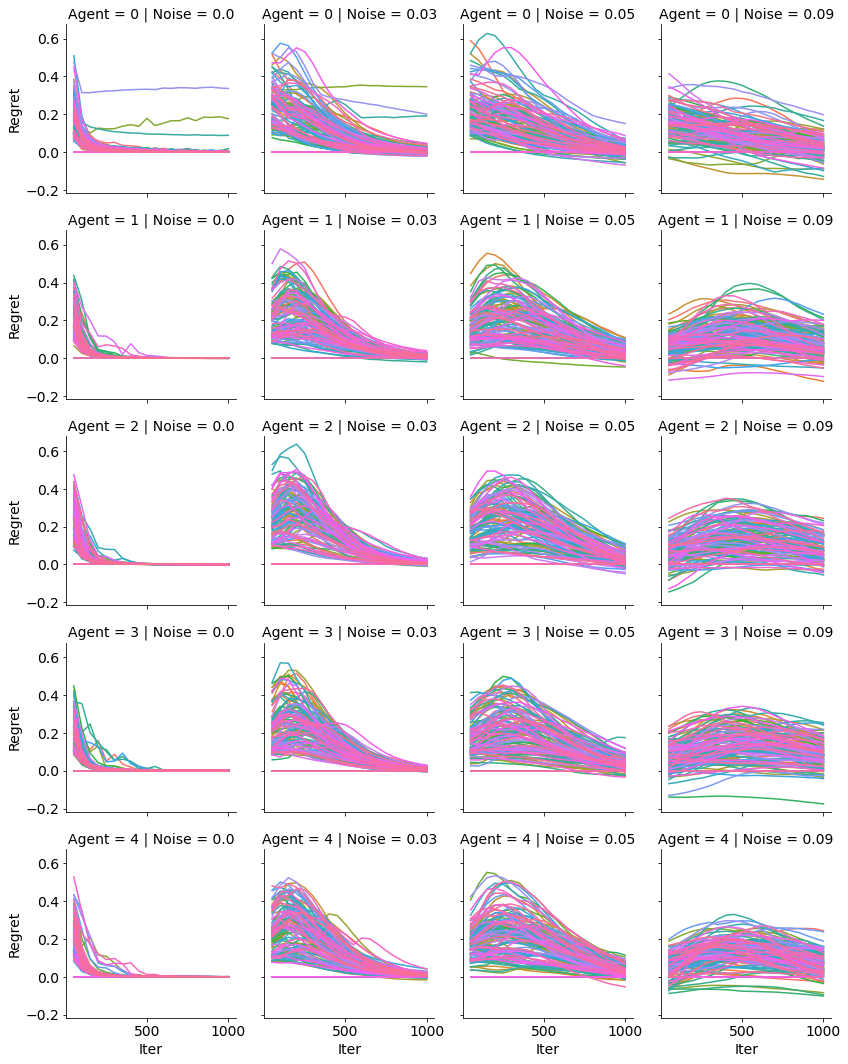

In [8]:
reg = sns.FacetGrid(reg_data, col='Noise', row='Agent', hue='Exp')
reg = reg.map(plt.plot, 'Iter', 'Regret')

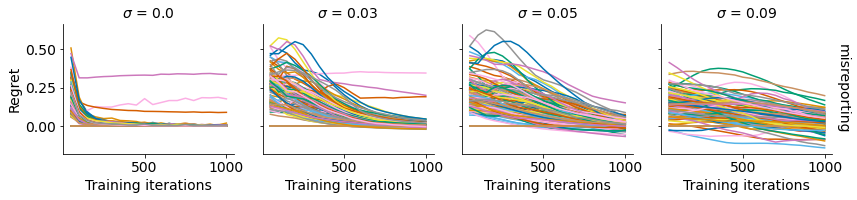

In [9]:
reg0 = sns.FacetGrid(reg_data.query("Agent == 0"), palette='colorblind', col='Noise', row='Agent', hue='Exp', margin_titles=True)
reg0 = reg0.map(plt.plot, 'Iter', 'Regret')
reg0.set_xlabels("Training iterations")
[plt.setp(ax.texts, text="") for ax in reg0.axes.flat]
#rows = ["Misreports","Truthful"]
reg0.set_titles(row_template = 'misreporting', col_template = '$\sigma$ = {col_name}')
reg0.savefig("5x3_agent0_sample0.pgf")

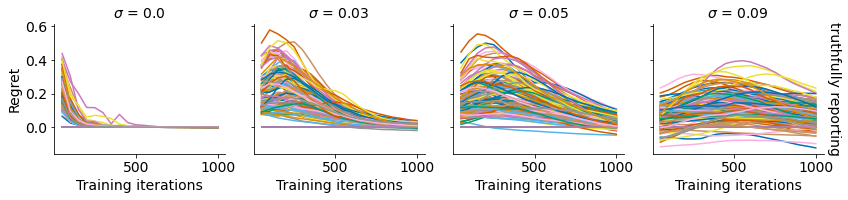

In [10]:
reg1 = sns.FacetGrid(reg_data.query("Agent == 1"), palette='colorblind', col='Noise', row='Agent', hue='Exp', margin_titles=True)
reg1 = reg1.map(plt.plot, 'Iter', 'Regret')
reg1.set_xlabels("Training iterations")
[plt.setp(ax.texts, text="") for ax in reg1.axes.flat]
#rows = ["Misreports","Truthful"]
reg1.set_titles(row_template = 'truthfully reporting', col_template = '$\sigma$ = {col_name}')
reg1.savefig("5x3_agent1_sample0.pgf")

In [11]:
print("A_0 Regret at 0.09: " + str(reg_data.query("Agent==0").query("Iter==1000").query("Noise==0.09")["Regret"].max()))
print("A_0 Regret at 0.05: " + str(reg_data.query("Agent==0").query("Iter==1000").query("Noise==0.05")["Regret"].max()))
print("A_0 Regret at 0.03: " + str(reg_data.query("Agent==0").query("Iter==1000").query("Noise==0.03")["Regret"].max()))
print("A_0 Regret at N/A: "  + str(reg_data.query("Agent==0").query("Iter==1000").query("Noise==0.0")["Regret"].max()))
print("min Revenue 0.09: " + str(train_data.query("Iter==1000").query("Noise==0.09")["Revenue"].min()))
#print("max Revenue 0.09: " + str(train_data.query("Agent==0").query("Iter==1000").query("Noise==0.09")["Revenue"].max()))
print("min Revenue 0.05: " + str(train_data.query("Iter==1000").query("Noise==0.05")["Revenue"].min()))
#print("max Revenue 0.05: " + str(train_data.query("Agent==0").query("Iter==1000").query("Noise==0.05")["Revenue"].max()))
print("min Revenue 0.03: " + str(train_data.query("Iter==1000").query("Noise==0.03")["Revenue"].min()))
#print("max Revenue 0.03: " + str(train_data.query("Agent==0").query("Iter==1000").query("Noise==0.03")["Revenue"].max()))
print("min Revenue N/A: "  + str(train_data.query("Iter==1000").query("Noise==0.0")["Revenue"].min()))
#print("max Revenue N/A: "  + str(train_data.query("Agent==0").query("Iter==1000").query("Noise==0.0")["Revenue"].max()))

Regret at 0.09: 0.19779066368937487
Regret at 0.05: 0.1508464366197586
Regret at 0.03: 0.3455545739270747
Regret at N/A: 0.33639137951831805
min Revenue 0.09: 1.1908811330795288
min Revenue 0.05: 1.7133227586746216
min Revenue 0.03: 1.857002854347229
min Revenue N/A: 1.9933693408966064


# Sum Regret

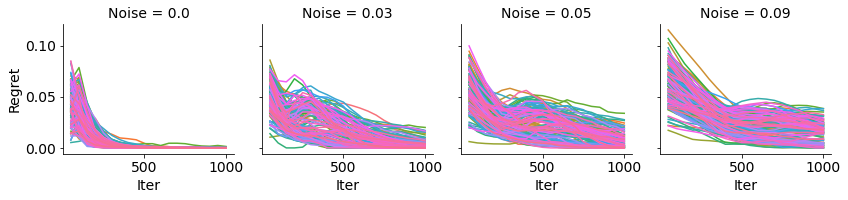

In [13]:
reg_sum = sns.FacetGrid(reg_sum_data, col='Noise', hue='Exp')
reg_sum = reg_sum.map(plt.plot, 'Iter', 'Regret')

# Utility

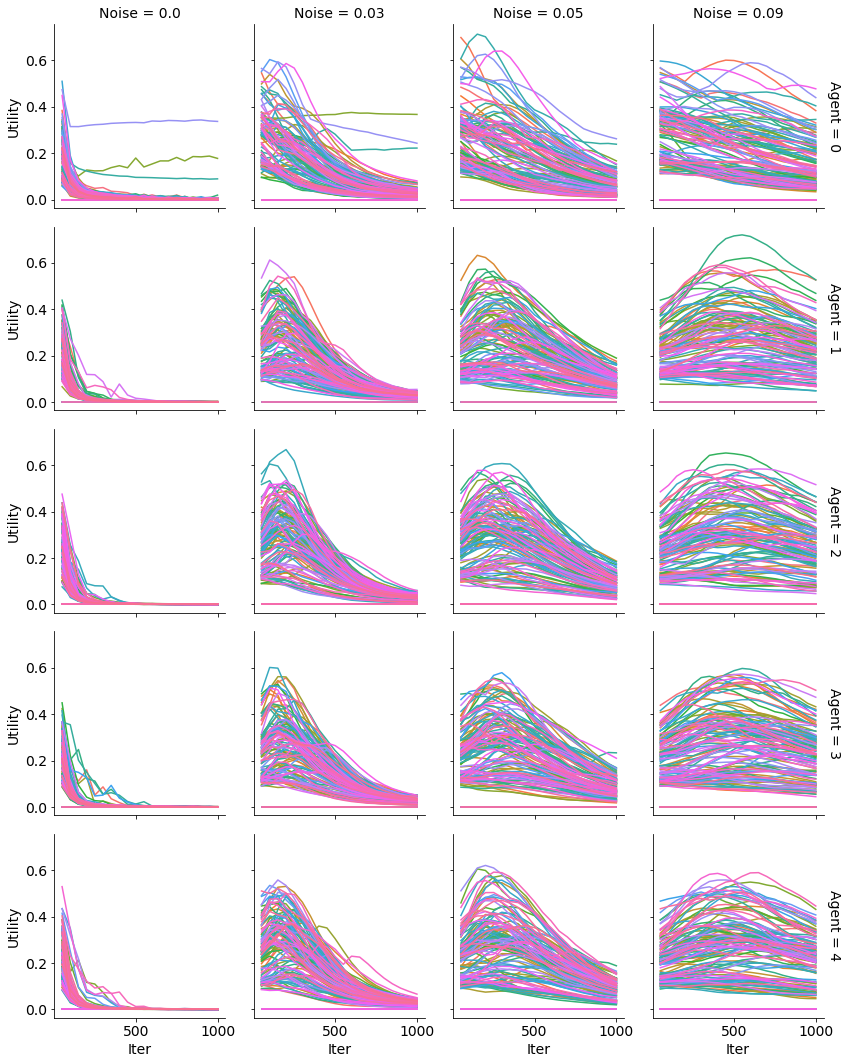

In [14]:
a = sns.FacetGrid(util_data, col='Noise', row='Agent', hue='Exp', margin_titles=True)
a = a.map(plt.plot, 'Iter', 'Utility')

# Welfare

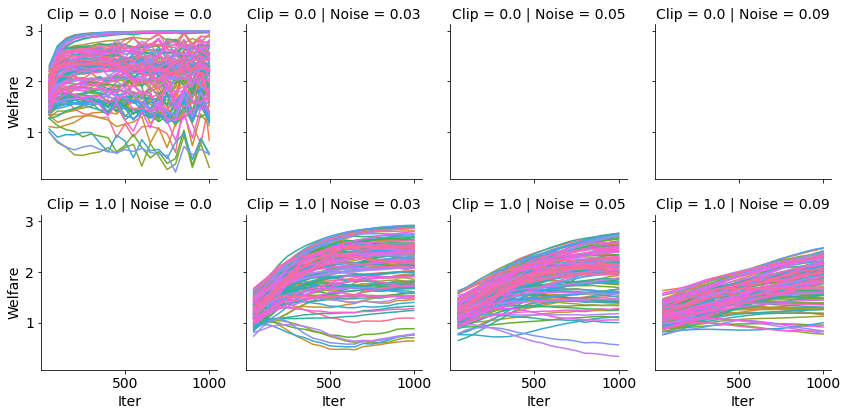

In [15]:
w = sns.FacetGrid(wel_data, col='Noise', row='Clip', hue='Exp')
w = w.map(plt.plot, 'Iter', 'Welfare')

# Revenue

In [16]:
print(train_data.query("Iter==1000").query("Noise==0.05")["Revenue"].min())
print(train_data.query("Iter==1000").query("Noise==0.05")["Revenue"].max())

1.7133227586746216
2.572047710418701


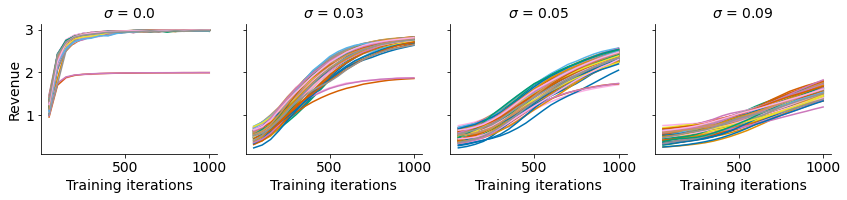

In [26]:
rev1 = sns.FacetGrid(train_data, palette='colorblind', col='Noise', hue='Exp', margin_titles=True)
rev1 = rev1.map(plt.plot, 'Iter', 'Revenue')
rev1.set_xlabels("Training iterations")
[plt.setp(ax.texts, text="") for ax in rev1.axes.flat]
#rows = ["Misreports","Truthful"]
rev1.set_titles(col_template = '$\sigma$ = {col_name}')
rev1.savefig("5x3_revenue.pgf")

#reg1 = sns.FacetGrid(reg_data.query("Agent == 1"), palette='colorblind', col='Noise', row='Agent', hue='Exp', margin_titles=True)
#reg1 = reg1.map(plt.plot, 'Iter', 'Regret')
#reg1.set_xlabels("Training iterations")
#[plt.setp(ax.texts, text="") for ax in reg1.axes.flat]
#rows = ["Misreports","Truthful"]
#reg1.savefig("5x3_agent1_sample0.pgf")

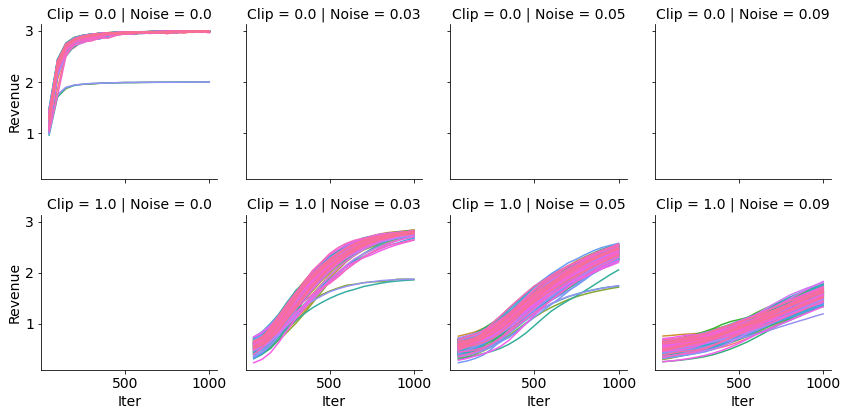

In [17]:
rev = sns.FacetGrid(train_data, col='Noise', row='Clip', hue='Exp')
rev = rev.map(plt.plot, 'Iter', 'Revenue')